In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.metrics import r2_score

from utils import scatter_plot, scatter_plot2, get_flat_features, get_gcn_features, get_targets
from dataset import NASBench101Dataset

In [5]:
from mlp import MLPPredictor

mlp = MLPPredictor()

In [6]:
mlp = MLPPredictor()
mlp.set_random_hyperparams()
mlp.fit(train_data, train_targets)

In [3]:
train_data = np.array(list(get_flat_features(dataset)))
test_data = np.array(list(get_flat_features(dataset_test)))

train_targets = np.array(list(get_targets(dataset)))
test_targets = np.array(list(get_targets(dataset_test)))

In [7]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = mlp.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[0/5000] cv_score=nan, params={'model_params': {'num_layers': 23, 'layer_width': 22, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.1, 'epochs': 100, 'device': device(type='cuda', index=0)}
--> new best score = 0, hparams = {'model_params': {'num_layers': 23, 'layer_width': 22, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.1, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 0/50
[1/5000] cv_score=nan, params={'model_params': {'num_layers': 23, 'layer_width': 14, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 1/50
Finished 2 rounds
Best hyperparams = {'model_params': {'num_layers': 23, 'layer_width': 14, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)} Score = 0


In [ ]:
mlp.save

In [2]:
dataset = NASBench101Dataset('data/nasbench.hdf5', "172") # 860
dataset_test  = NASBench101Dataset('data/nasbench.hdf5', "all")
dataset_size = len(dataset)

In [3]:
train_data = [a for a in dataset]
test_data = [a for a in dataset_test]
train_targets = np.array(list(get_targets(dataset)))
test_targets = np.array(list(get_targets(dataset_test)))

In [4]:
from gcn import GCNPredictor

gcn_predictor = GCNPredictor()

gcn_predictor.fit(train_data, train_targets)

[05/08 01:22:18] INFO (root) Epoch 1/300, Loss: 1.0086, MSE: 10085.7895
[05/08 01:22:18] INFO (root) Epoch 2/300, Loss: 1.0058, MSE: 10057.8666
[05/08 01:22:18] INFO (root) Epoch 3/300, Loss: 1.0031, MSE: 10031.4721
[05/08 01:22:19] INFO (root) Epoch 4/300, Loss: 1.0039, MSE: 10038.8871
[05/08 01:22:19] INFO (root) Epoch 5/300, Loss: 1.0037, MSE: 10036.6026
[05/08 01:22:19] INFO (root) Epoch 6/300, Loss: 1.0032, MSE: 10032.0391
[05/08 01:22:19] INFO (root) Epoch 7/300, Loss: 1.0011, MSE: 10011.4851
[05/08 01:22:19] INFO (root) Epoch 8/300, Loss: 0.9990, MSE: 9990.1774
[05/08 01:22:19] INFO (root) Epoch 9/300, Loss: 0.9969, MSE: 9968.8534
[05/08 01:22:20] INFO (root) Epoch 10/300, Loss: 0.9929, MSE: 9929.0293
[05/08 01:22:20] INFO (root) Epoch 11/300, Loss: 0.9889, MSE: 9888.8751
[05/08 01:22:20] INFO (root) Epoch 12/300, Loss: 0.9840, MSE: 9839.8001
[05/08 01:22:20] INFO (root) Epoch 13/300, Loss: 0.9773, MSE: 9773.1137
[05/08 01:22:20] INFO (root) Epoch 14/300, Loss: 0.9700, MSE: 9699

0.008487583

In [5]:
predictions = gcn_predictor.predict(test_data)

[05/08 01:23:02] INFO (root) Batch 1, Loss: 1.3014, MSE: 13013.8918
[05/08 01:23:02] INFO (root) Batch 2, Loss: 1.3170, MSE: 13170.4651
[05/08 01:23:02] INFO (root) Batch 3, Loss: 1.3284, MSE: 13284.2587


c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\collate.py:176: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.as_tensor(batch)


[05/08 01:23:02] INFO (root) Batch 4, Loss: 1.3135, MSE: 13134.7619
[05/08 01:23:02] INFO (root) Batch 5, Loss: 1.3435, MSE: 13434.6808
[05/08 01:23:02] INFO (root) Batch 6, Loss: 1.3316, MSE: 13315.8011
[05/08 01:23:02] INFO (root) Batch 7, Loss: 1.3226, MSE: 13226.2297
[05/08 01:23:02] INFO (root) Batch 8, Loss: 1.3099, MSE: 13098.8638
[05/08 01:23:02] INFO (root) Batch 9, Loss: 1.3074, MSE: 13074.4595
[05/08 01:23:02] INFO (root) Batch 10, Loss: 1.3167, MSE: 13166.5441
[05/08 01:23:02] INFO (root) Batch 11, Loss: 1.3205, MSE: 13205.0833
[05/08 01:23:02] INFO (root) Batch 12, Loss: 1.3119, MSE: 13119.1308
[05/08 01:23:03] INFO (root) Batch 13, Loss: 1.3033, MSE: 13033.1313
[05/08 01:23:03] INFO (root) Batch 14, Loss: 1.3126, MSE: 13126.1688
[05/08 01:23:03] INFO (root) Batch 15, Loss: 1.3073, MSE: 13073.1515
[05/08 01:23:03] INFO (root) Batch 16, Loss: 1.3083, MSE: 13083.3245
[05/08 01:23:03] INFO (root) Batch 17, Loss: 1.3031, MSE: 13030.8382
[05/08 01:23:03] INFO (root) Batch 18, L

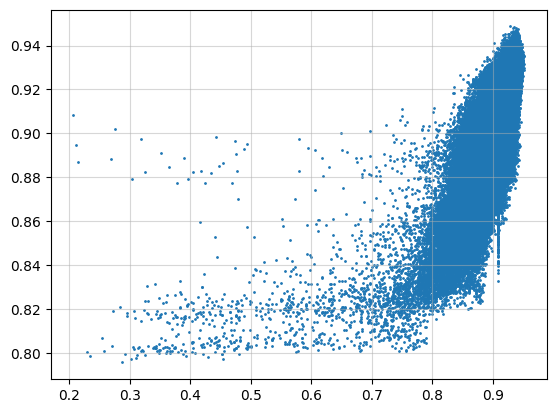

In [6]:
plt.scatter(test_targets, predictions, s=1)
#plt.plot([0, 1], [0, 1], color='red', linewidth=1, linestyle='--')
plt.grid(alpha=0.5)
plt.show()

In [7]:
metrics = gcn_predictor.evaluate(test_data, test_targets)
print(metrics)

{'mae': 0.01041883507759928, 'rmse': 0.018921151420415644, 'pearson': 0.7723287624336499, 'spearman': 0.8076157536678088, 'kendalltau': 0.6173882398147218, 'r2_score': 0.5797503246622496}


In [8]:
# save the model
gcn_predictor.save("models/gcn_172_kt61.pt")

In [9]:
from gcn import GCNPredictor

gcn_new = GCNPredictor()
gcn_new.load("models/gcn_172_kt61.pt")

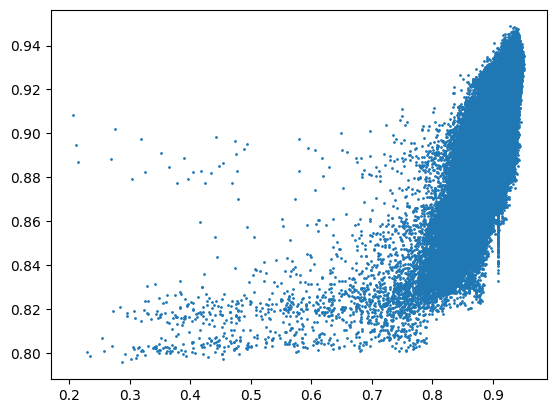

In [10]:
gcn_new_predictions = gcn_new.predict(test_data)
plt.scatter(test_targets, gcn_new_predictions, s=1)
plt.show()

In [6]:
from mlp import MLPPredictor

mlp_predictor = MLPPredictor()

train_data = np.array(list(get_flat_features(dataset)))
test_data = np.array(list(get_flat_features(dataset_test)))

train_targets = np.array(list(get_targets(dataset)))
test_targets = np.array(list(get_targets(dataset_test)))

mlp_predictor.fit(train_data, train_targets)

[05/08 01:24:33] INFO (root) Epoch 1, Loss: 0.7176
[05/08 01:24:33] INFO (root) Epoch 2, Loss: 0.6691
[05/08 01:24:33] INFO (root) Epoch 3, Loss: 0.6261
[05/08 01:24:33] INFO (root) Epoch 4, Loss: 0.5875
[05/08 01:24:33] INFO (root) Epoch 5, Loss: 0.5466
[05/08 01:24:33] INFO (root) Epoch 6, Loss: 0.5096
[05/08 01:24:33] INFO (root) Epoch 7, Loss: 0.4738
[05/08 01:24:33] INFO (root) Epoch 8, Loss: 0.4310
[05/08 01:24:33] INFO (root) Epoch 9, Loss: 0.3795
[05/08 01:24:33] INFO (root) Epoch 10, Loss: 0.3140
[05/08 01:24:33] INFO (root) Epoch 11, Loss: 0.2282
[05/08 01:24:33] INFO (root) Epoch 12, Loss: 0.1223
[05/08 01:24:33] INFO (root) Epoch 13, Loss: 0.0241
[05/08 01:24:34] INFO (root) Epoch 14, Loss: 0.0149
[05/08 01:24:34] INFO (root) Epoch 15, Loss: 0.0118
[05/08 01:24:34] INFO (root) Epoch 16, Loss: 0.0015
[05/08 01:24:34] INFO (root) Epoch 17, Loss: 0.0042
[05/08 01:24:34] INFO (root) Epoch 18, Loss: 0.0024
[05/08 01:24:34] INFO (root) Epoch 19, Loss: 0.0010
[05/08 01:24:34] INFO

In [8]:
mlp_predictions = mlp_predictor.predict(test_data)

plt.scatter(test_targets, mlp_predictions, s=1)
plt.show()

NameError: name 'ytest' is not defined

### Hyperparameter optimization

In [ ]:
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = mlp_predictor.run_hpo(
    xtrain=X_train,
    ytrain=y_train,
    train_info=None,  # or provide train_info if needed
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[0/5000] cv_score=0.7010, params={'model_params': {'num_layers': 8, 'layer_width': 7, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cpu')}
--> new best score = 0.7009540584917701, hparams = {'model_params': {'num_layers': 8, 'layer_width': 7, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cpu')}
patience = 0/50
[1/5000] cv_score=0.7043, params={'model_params': {'num_layers': 5, 'layer_width': 8, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cpu')}
--> new best score = 0.7042689664515893, hparams = {'model_params': {'num_layers': 5, 'layer_width': 8, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cpu')}
patience = 0/50
Finished 2 rounds
Best hyperparams = {'model_p

In [ ]:
# Fit the predictor with the **best** hyperparameters found
mlp_predictor.fit(X_train, y_train)

# Use the fitted predictor to make predictions on new data (X_test)
y_pred = mlp_predictor.query(X_test)

# Evaluate the predictor on the test set
metrics = mlp_predictor.evaluate(X_test, y_test)
metrics["cv_score"] = best_cv_score
print("Cross validation score:", best_cv_score)
print("Metrics: ", metrics)

Cross validation score: 0.7042689664515893
Metrics:  {'mae': 0.16278579500677773, 'rmse': 0.20790954091686406, 'pearson': 0.8362298444082947, 'spearman': 0.8238486974246608, 'kendalltau': 0.6281883662075298, 'r2_score': 0.6956982752575633, 'cv_score': 0.7042689664515893}


### Other

In [ ]:
# Print min value in targets and train
print("Min value in targets: {}".format(np.min(NASBench101Dataset.denormalize(y_train))))
print("Min value in y_test: {}".format(np.min(NASBench101Dataset.denormalize(y_test))))

Min value in targets: 0.21173878014087677
Min value in y_test: 0.26983171701431274


In [ ]:
# Print number of y_test values in range 0.92-0.93
print("Number of y_test values in range 0.92-0.93: {}/{}".format(len([t for t in y_test if 0.92 <= NASBench101Dataset.denormalize(t) <= 0.93]), len(y_test)))

# Print number of y_train values in range 0.92-0.93
print("Number of y_train values in range 0.92-0.93: {}/{}".format(len([t for t in y_train if 0.92 <= NASBench101Dataset.denormalize(t) <= 0.93]), len(y_train)))

Number of y_test values in range 0.92-0.93: 1187/6000
Number of y_train values in range 0.92-0.93: 4619/24000


In [ ]:
from xgb import XGBPredictor

xgb_predictor = XGBPredictor()
xgb_predictor.fit(X_train, y_train)

y_pred = xgb_predictor.query(X_test)

metrics = xgb_predictor.evaluate(X_test, y_test)

In [ ]:
from linear_reg import LRPredictor

lr_predictor = LRPredictor()
lr_predictor.fit(X_train, y_train)

y_pred = lr_predictor.query(X_test)

metrics = lr_predictor.evaluate(X_test, y_test)

In [ ]:
# Print predicted values above 1
print("Number of predicted values above 1: {}".format(len([t for t in y_pred if t > 1])))

Number of predicted values above 1: 71491


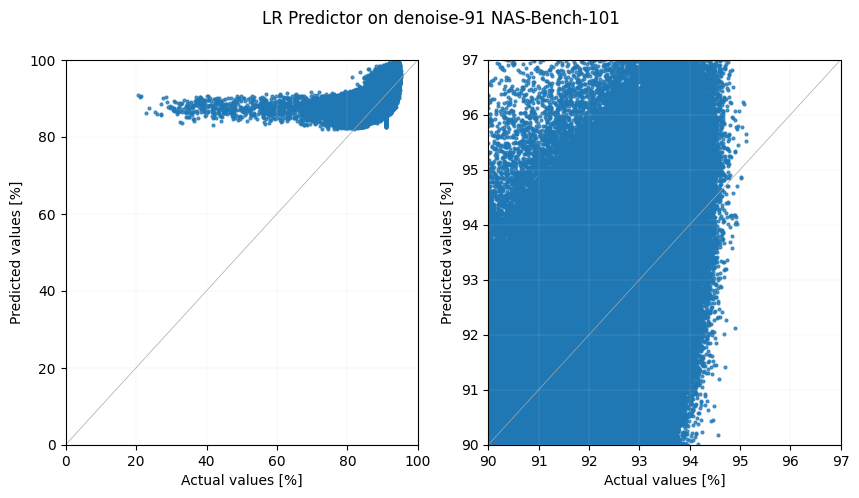

In [ ]:
scatter_plot2(
    NASBench101Dataset.denormalize(y_test)*100, 
    NASBench101Dataset.denormalize(y_pred)*100,
    "LR Predictor on denoise-91 NAS-Bench-101")

In [ ]:
# Print number of y_pred values in range 0.92-0.93
print("Number of y_pred values in range 0.92-0.93: {}/{}".format(len([t for t in y_pred if 0.92 <= NASBench101Dataset.denormalize(t) <= 0.93]), len(y_pred)))

Number of y_pred values in range 0.92-0.93: 76293/423624


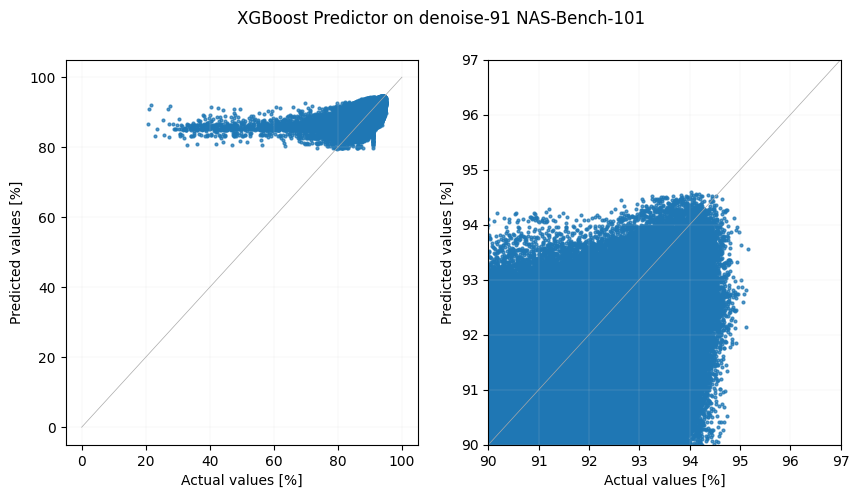

In [ ]:
scatter_plot2(
    NASBench101Dataset.denormalize(y_test)*100, 
    NASBench101Dataset.denormalize(y_pred)*100,
    "XGBoost Predictor on denoise-91 NAS-Bench-101")

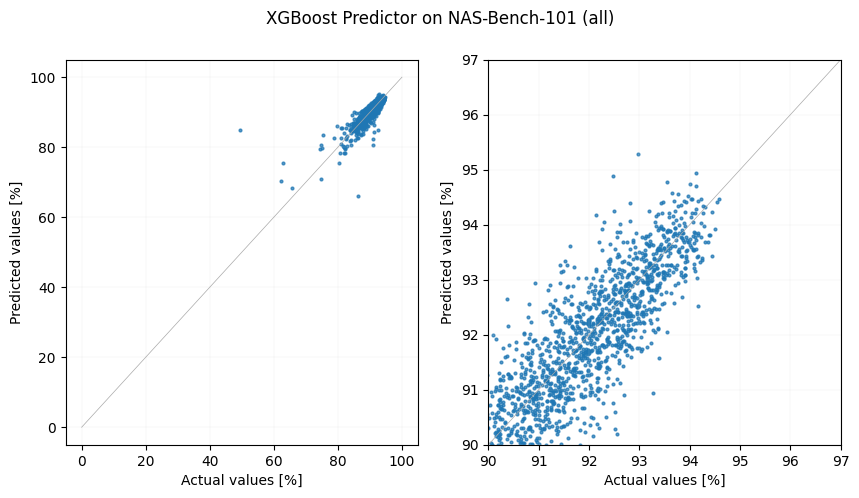

In [ ]:
scatter_plot2(
    NASBench101Dataset.denormalize(y_test)*100,
    NASBench101Dataset.denormalize(y_pred)*100,
    "XGBoost Predictor on NAS-Bench-101 (all)",
)

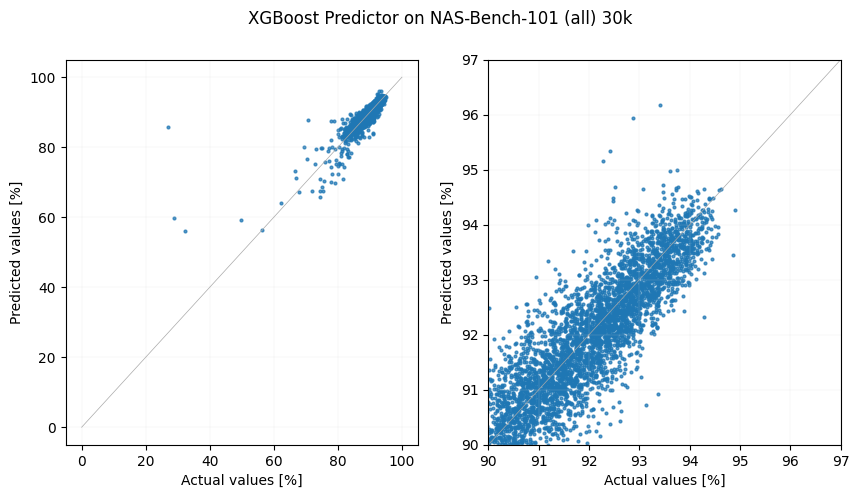

In [ ]:
scatter_plot2(
    NASBench101Dataset.denormalize(y_test)*100,
    NASBench101Dataset.denormalize(y_pred)*100,
    "XGBoost Predictor on NAS-Bench-101 (all) 30k",
)